# Data Analysis Project
### Spring 2024 
### Chanyoung Park
## Analyzing Insurance Auto Claims

<br>
<br>
<p align="center">
<img 
  src="./files/car_accident.png" 
  alt="Car Accident" 
  width="600"
  height="450"
/>
</p>

<br>

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [3]:
# Load necessary library
library(tidyverse)

# Specify the URL of the .rds file
claims_df <- readRDS(url("https://gmubusinessanalytics.netlify.app/data/claims_df.rds"))




In [4]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1

**Question**:
What are the demographic characteristics (age, gender, location) of our most profitable customers?

**Answer**:
Yes, there are demographic characteristics that distinguish our most profitable customers.

Gender: Among the most profitable customers, 59.09% are Female, and 40.90% are Male, indicating a higher proportion of females in the most profitable customer segment.

Location: The distribution of the most profitable customers by state shows that California (35.46%), Oregon (28.23%), and Arizona (18.694%) have the highest proportions, suggesting that location is a relevant factor in profitability.

## Supporting Analysis

In [32]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

gender,count,percentage
<fct>,<int>,<dbl>
Female,923,59.09091
Male,639,40.90909


customer_state,count,percentage
<fct>,<int>,<dbl>
Washington,119,7.618438
Oregon,441,28.233035
California,554,35.467350
Nevada,156,9.987196
Arizona,292,18.693982


customer_state,gender,n
<fct>,<fct>,<int>
Washington,Female,72
Washington,Male,47
Oregon,Female,264
Oregon,Male,177
California,Female,314
California,Male,240
Nevada,Female,100
Nevada,Male,56
Arizona,Female,173


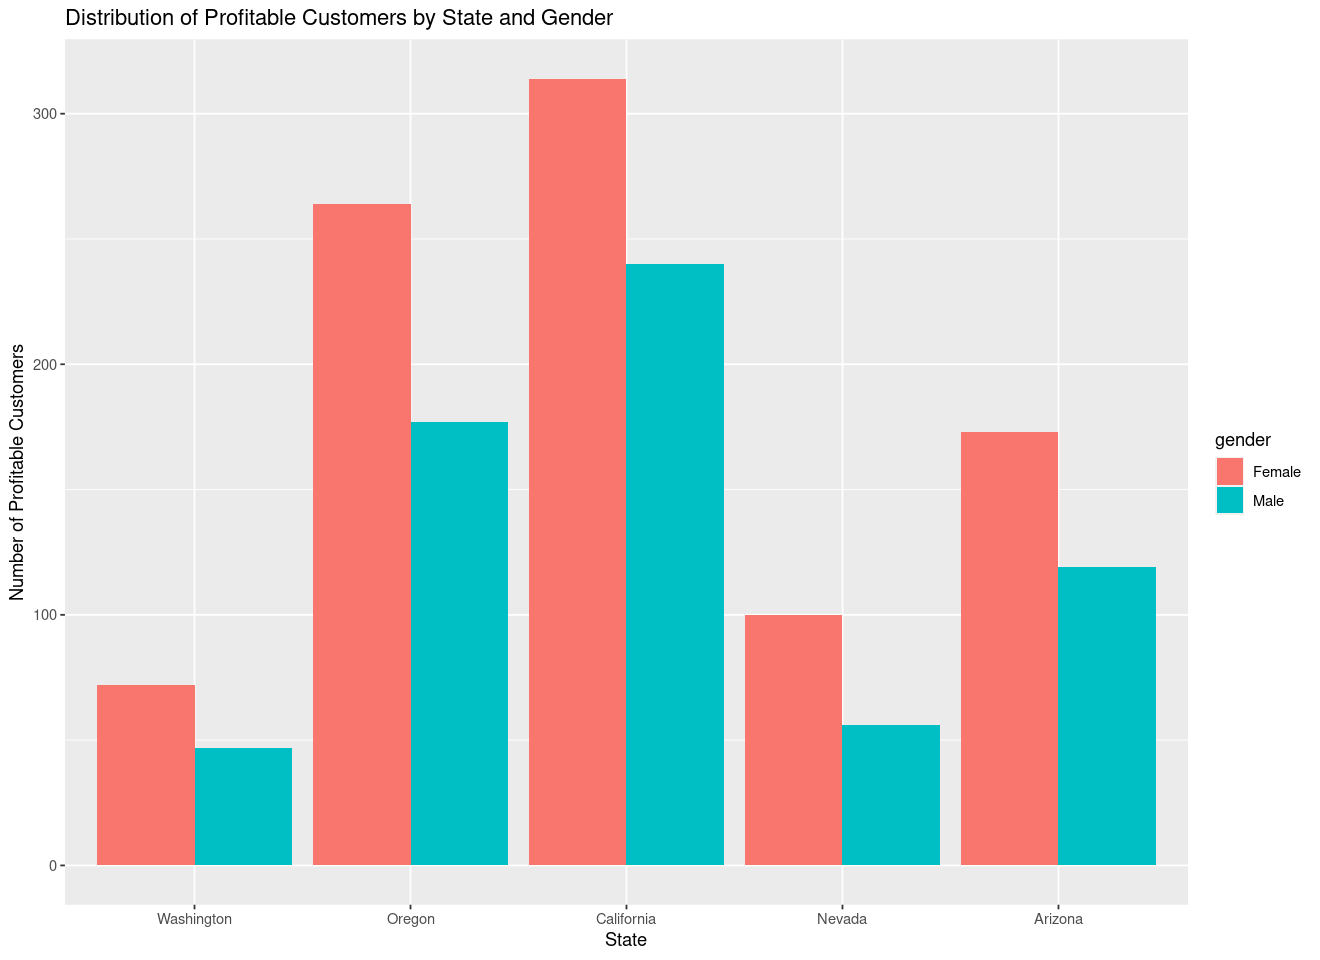

In [37]:
library(ggplot2)
library(dplyr)


# Calculate the overall percentage of profitable customers by gender
gender_distribution <- profitable_customers %>%
  group_by(gender) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Calculate the distribution of profitable customers by state
state_distribution <- profitable_customers %>%
  group_by(customer_state) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# gender distribution
gender_distribution

# state distribution
state_distribution


# Summary data frames
profitable_customers <- claims_df %>% filter(customer_lifetime_value > quantile(customer_lifetime_value, 0.75))
summary_q1 <- profitable_customers %>% count(customer_state, gender)
summary_q1

# Bar chart
ggplot(summary_q1, aes(x = customer_state, y = n, fill = gender)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = 'Distribution of Profitable Customers by State and Gender',
       x = 'State',
       y = 'Number of Profitable Customers')





## Question 2


**Question**:
Is there a relation between the frequency and amount of claims to customer lifetime value?


**Answer**:
Yes, there is a relation between the frequency and amount of claims to customer lifetime value.

The correlation between total claims and customer lifetime value is -0.28, indicating a slight negative relationship; as the number of claims increases, customer lifetime value tends to decrease.
The correlation between total claims amount and customer lifetime value is -0.38, showing a moderate negative relationship; as the total claims amount increases, customer lifetime value tends to decrease more significantly.

## Supporting Analysis


,total_claims,total_claims_amount,customer_lifetime_value
total_claims,1.0000000,0.7362366,-0.2863264
total_claims_amount,0.7362366,1.0000000,-0.3861211
customer_lifetime_value,-0.2863264,-0.3861211,1.0000000


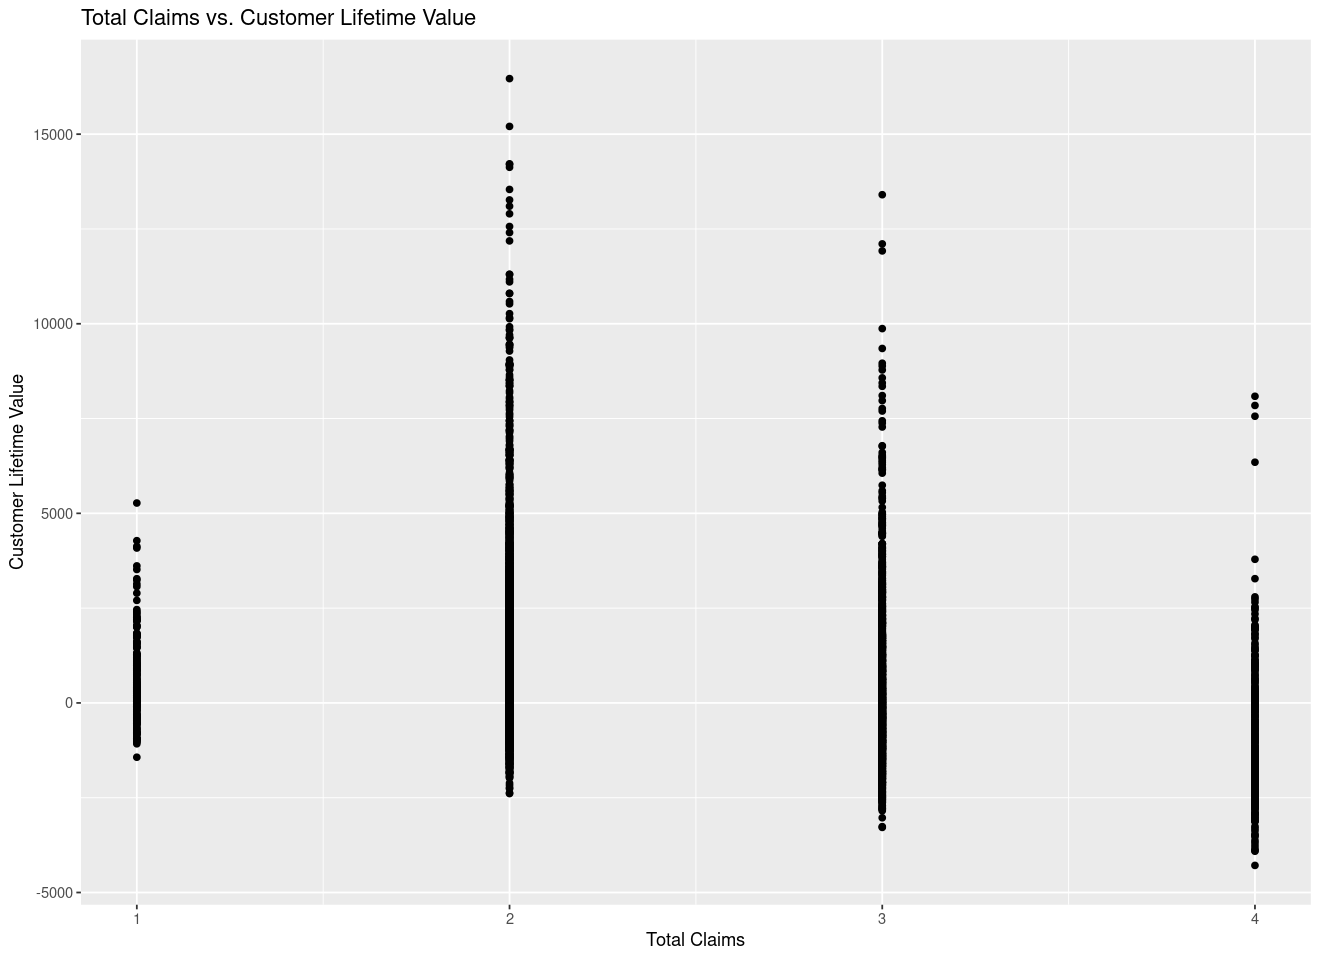

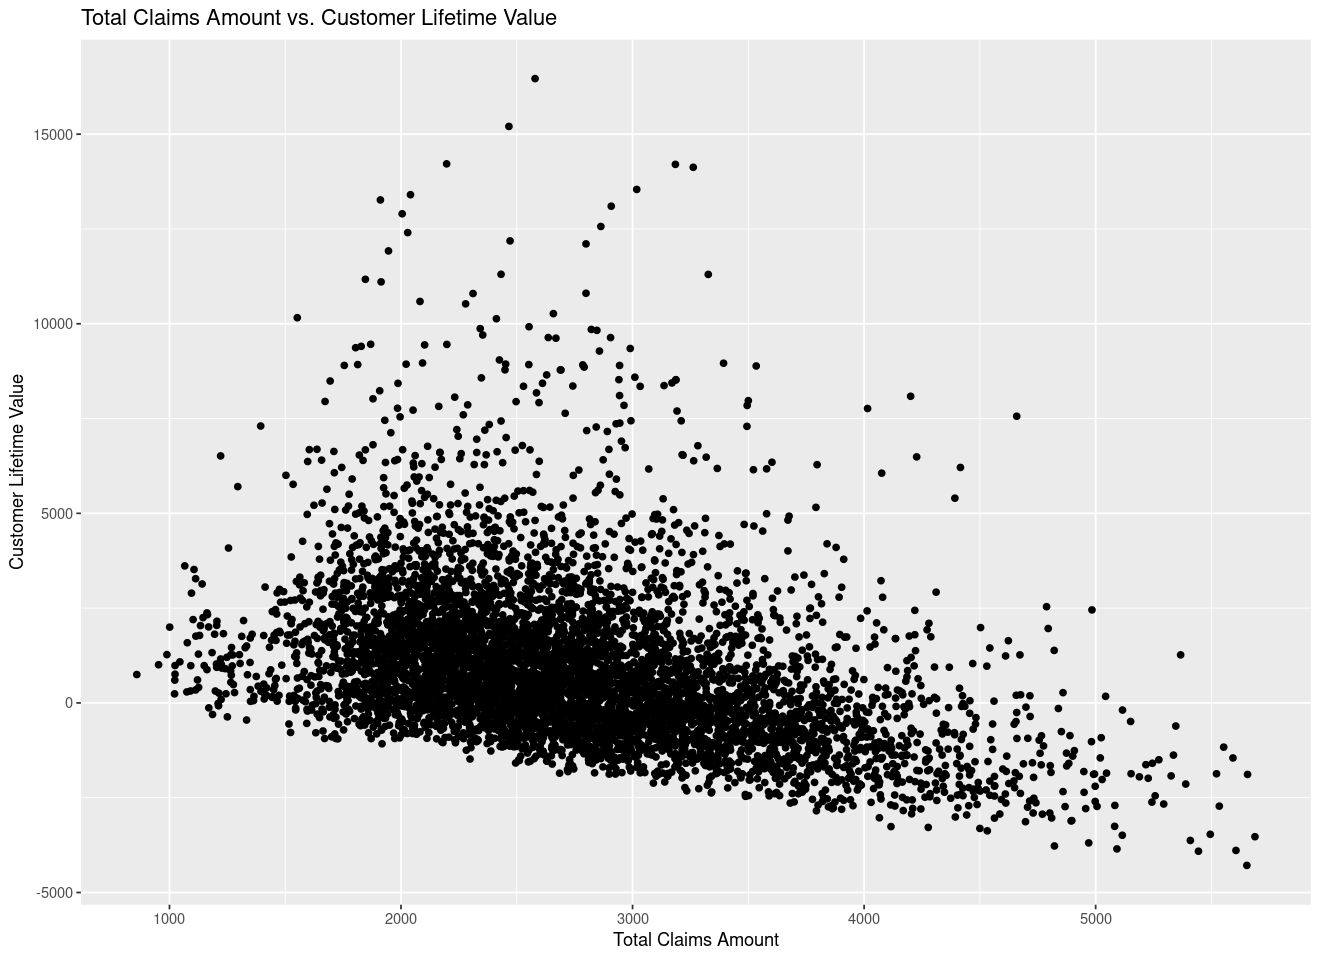

In [7]:
# Summary dataframe with correlation coefficients
summary_q2 <- claims_df %>% select(total_claims, total_claims_amount, customer_lifetime_value) %>%
  cor()
summary_q2

# Scatter plot for total_claims vs. customer_lifetime_value
ggplot(claims_df, aes(x = total_claims, y = customer_lifetime_value)) +
  geom_point() +
  labs(title = 'Total Claims vs. Customer Lifetime Value',
       x = 'Total Claims',
       y = 'Customer Lifetime Value')

# Scatter plot for total_claims_amount vs. customer_lifetime_value
ggplot(claims_df, aes(x = total_claims_amount, y = customer_lifetime_value)) +
  geom_point() +
  labs(title = 'Total Claims Amount vs. Customer Lifetime Value',
       x = 'Total Claims Amount',
       y = 'Customer Lifetime Value')





## Question 3


**Question**:
Are there significant differences in lifetime values between customers with different policy types?


**Answer**:
Yes, there are significant differences in lifetime values between customers with different policy types.

Corporate policy holders have an average customer lifetime value of 951.32,
Personal policy holders have an average of 923.66,
Special policy holders have a lower average of 745.95, indicating that policy type is a determinant in customer lifetime value.

## Supporting Analysis


policy,avg_customer_lifetime_value
<fct>,<dbl>
Personal,923.6647
Corporate,951.3238
Special,745.9582


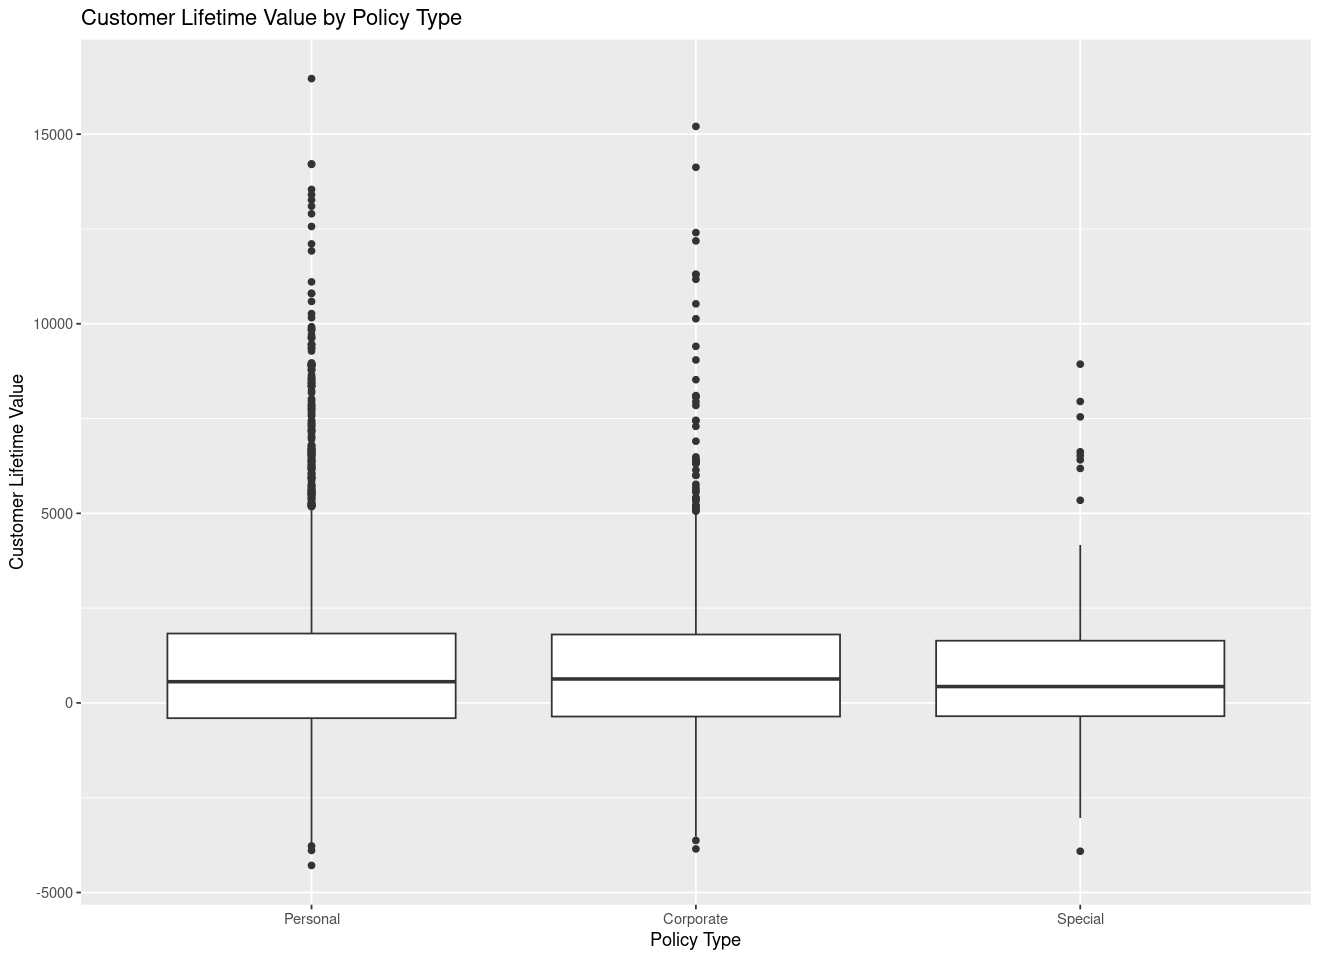

In [14]:
# Summary dataframe with average customer lifetime value by policy type
summary_q3 <- claims_df %>% group_by(policy) %>%
  summarise(avg_customer_lifetime_value = mean(customer_lifetime_value))
summary_q3

# Box plot
ggplot(claims_df, aes(x = policy, y = customer_lifetime_value)) +
  geom_boxplot() +
  labs(title = 'Customer Lifetime Value by Policy Type',
       x = 'Policy Type',
       y = 'Customer Lifetime Value')










## Question 4


**Question**:
Which customer behaviors or attributes are correlated with higher lifetime values?


**Answer**:
Yes, customer behaviors or attributes are correlated with higher lifetime values.

The correlation between monthly premium and customer lifetime value is 0.7368, indicating a strong positive relationship; as the monthly premium increases, customer lifetime value also tends to increase significantly.

## Supporting Analysis


,monthly_premium,customer_lifetime_value
monthly_premium,1.0000000,0.7368989
customer_lifetime_value,0.7368989,1.0000000


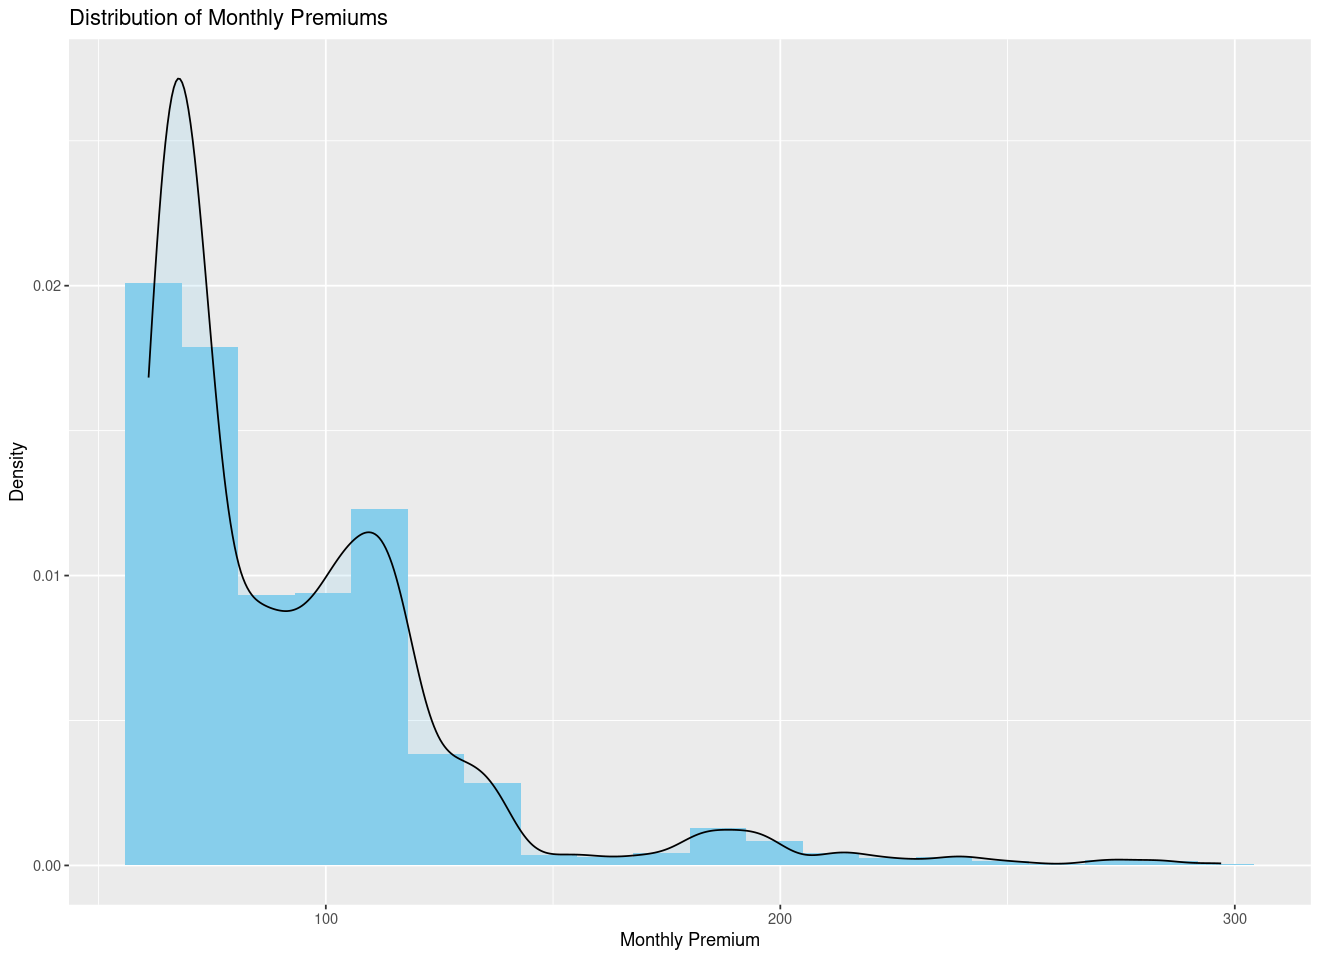

In [15]:
# Summary dataframe with correlation coefficient
summary_q4 <- claims_df %>% select(monthly_premium, customer_lifetime_value) %>%
  cor()
summary_q4

# Histogram
ggplot(claims_df, aes(x = monthly_premium)) +
  geom_histogram(aes(y = ..density..), bins = 20, fill = "skyblue") +
  geom_density(alpha = .2, fill = "skyblue") +
  labs(title = 'Distribution of Monthly Premiums',
       x = 'Monthly Premium',
       y = 'Density')




## Question 5


**Question**:
Do certain car models or years have a higher frequency of claims?


**Answer**:
No, there does not appear to be a significant difference in the frequency of claims among different vehicle classes. The average number of claims is fairly consistent across vehicle classes, with slight variations but no clear trend indicating that certain car models or types have a markedly higher frequency of claims.


## Supporting Analysis


vehicle_class,avg_total_claims
<fct>,<dbl>
Two-Door Car,2.411765
Four-Door Car,2.387644
Sports Car,2.400000
SUV,2.400482
Luxury Car,2.344538
Luxury SUV,2.233083


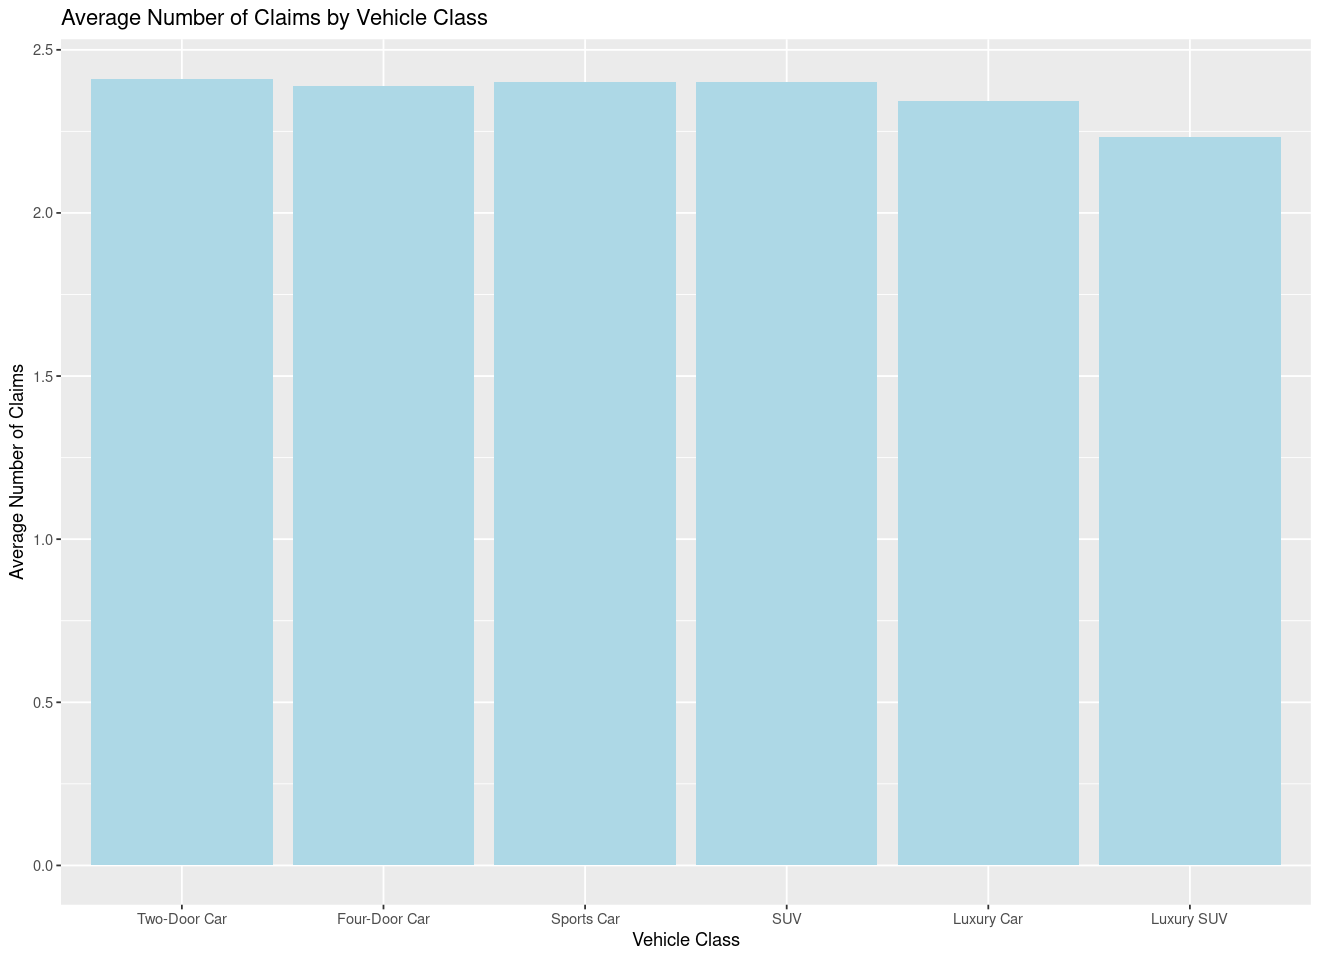

In [26]:
# Summary dataframe with the average number of claims by vehicle class
summary_q5 <- claims_df %>% group_by(vehicle_class) %>%
  summarise(avg_total_claims = mean(total_claims))
summary_q5

# Bar chart
ggplot(summary_q5, aes(x = vehicle_class, y = avg_total_claims)) +
  geom_col(fill = "lightblue") +
  labs(title = 'Average Number of Claims by Vehicle Class',
       x = 'Vehicle Class',
       y = 'Average Number of Claims')





## Question 6


**Question**:
What is the impact of deductibles on the number of claims and overall profitability?


**Answer**:
Yes, the type of coverage, which can serve as a proxy for deductible levels, has an impact on both the number of claims and overall profitability.

Customers with Basic coverage have a higher average number of claims (2.53) compared to those with Extended (2.166) and Premium (2.154) coverages, indicating that higher deductibles (associated with more comprehensive coverages) may lead to fewer claims.
Regarding profitability, customers with Premium coverage have the highest average customer lifetime value (2879.41), followed by Extended (1538.96) and Basic (326), suggesting that higher coverage levels (and possibly higher deductibles) are associated with greater profitability.

## Supporting Analysis


coverage,avg_total_claims,avg_customer_lifetime_value
<fct>,<dbl>,<dbl>
Basic,2.537090,326.0904
Extended,2.166846,1538.9661
Premium,2.154514,2879.4115


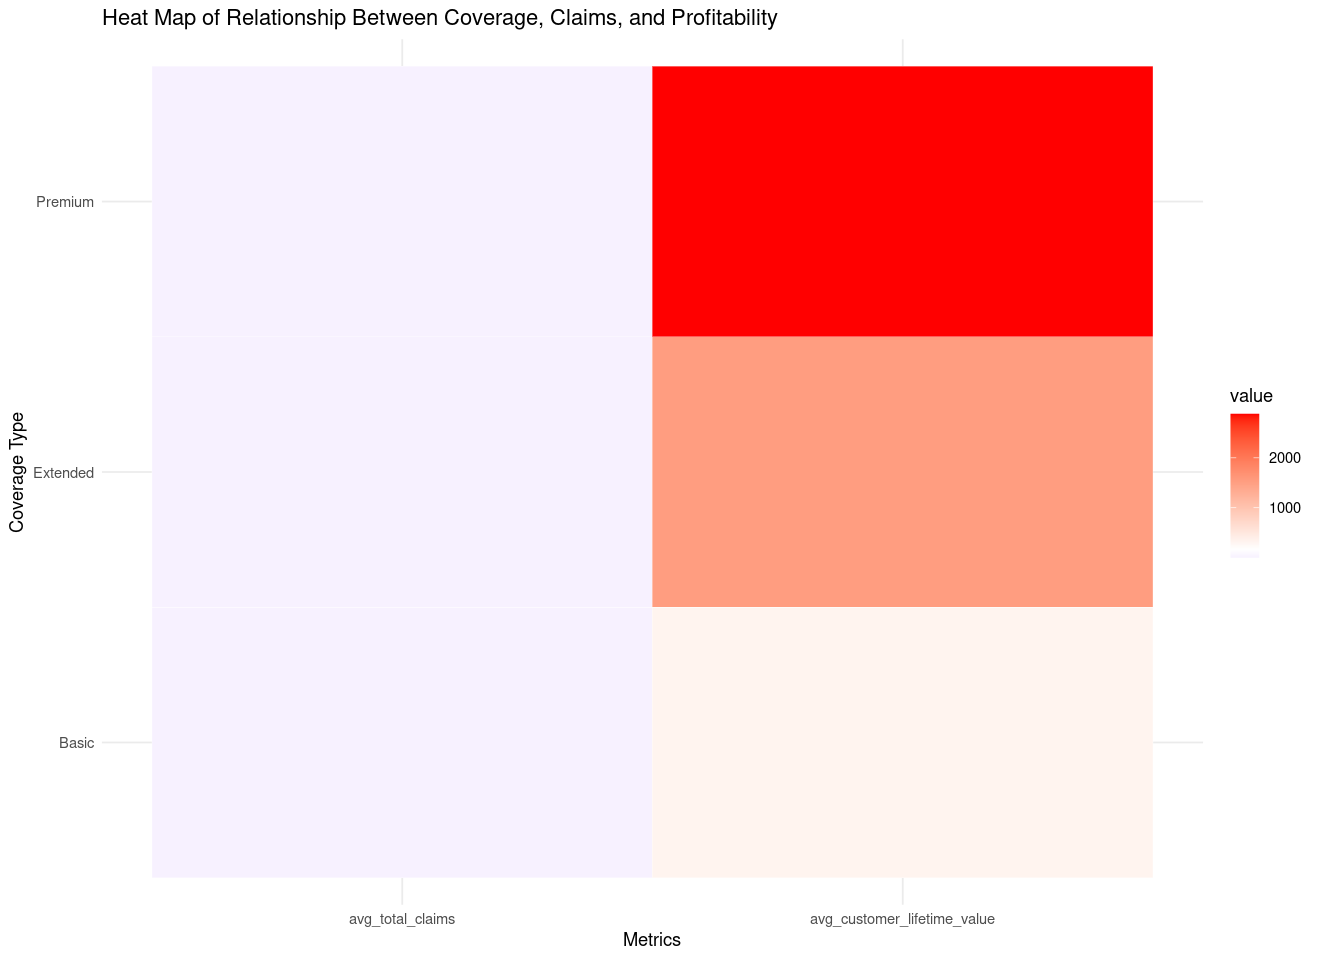

In [38]:
library(ggplot2)
library(dplyr)
library(reshape2)

# Assuming 'data' is your dataframe name
coverage_summary <- claims_df %>%
  group_by(coverage) %>%
  summarise(avg_total_claims = mean(total_claims), 
            avg_customer_lifetime_value = mean(customer_lifetime_value))

# Melt the data for use in ggplot
coverage_melted <- melt(coverage_summary, id.vars = 'coverage')

# Create the heat map using the melted data
ggplot(coverage_melted, aes(x = variable, y = coverage, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = median(coverage_melted$value), limit = c(NA, NA)) +
  labs(title = "Heat Map of Relationship Between Coverage, Claims, and Profitability", x = "Metrics", y = "Coverage Type") +
  theme_minimal()

# Print the summary dataframe
coverage_summary




## Question 7


**Question**:
Are there geographic areas where claims are more frequent or more costly?


**Answer**:
No, there do not appear to be significant geographic differences in the frequency of claims across states. The average number of claims is relatively consistent among the states. However, when it comes to the costliness of claims:

There are slight variations in the average claims amount by state, with Washington (2760.73), California (2775.01), and Nevada (2753.5) having slightly higher average claim amounts compared to Arizona (2707.75) and Oregon (2725.01). These differences suggest that while claim frequencies are similar, the costliness of claims can vary by geographic area, albeit with a modest difference.

## Supporting Analysis


customer_state,avg_total_claims,avg_total_claims_amount
<fct>,<dbl>,<dbl>
Washington,2.402527,2760.731
Oregon,2.384005,2725.011
California,2.411628,2775.018
Nevada,2.384359,2753.501
Arizona,2.365792,2707.752


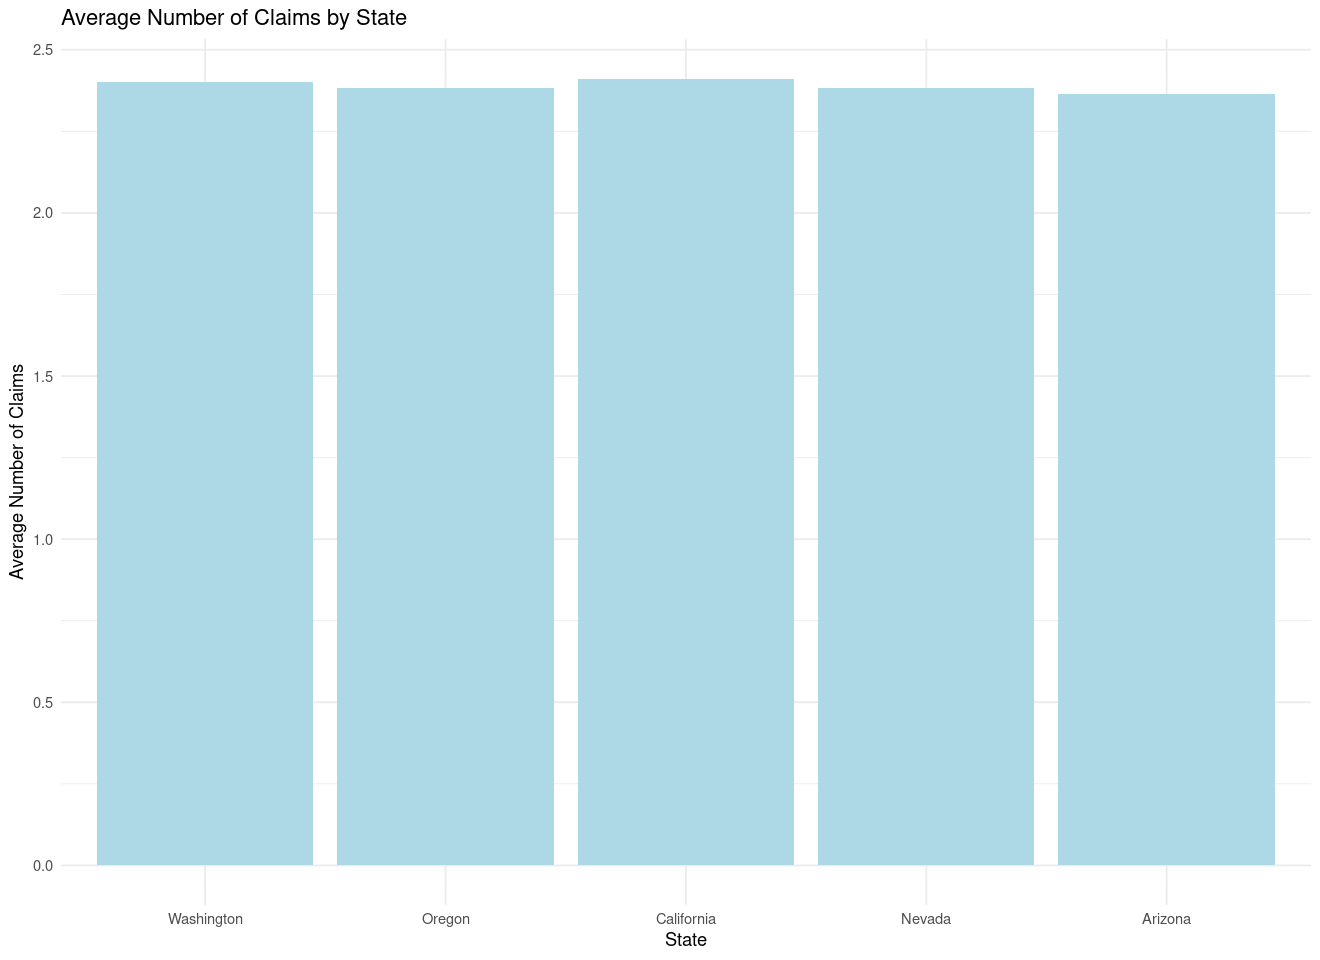

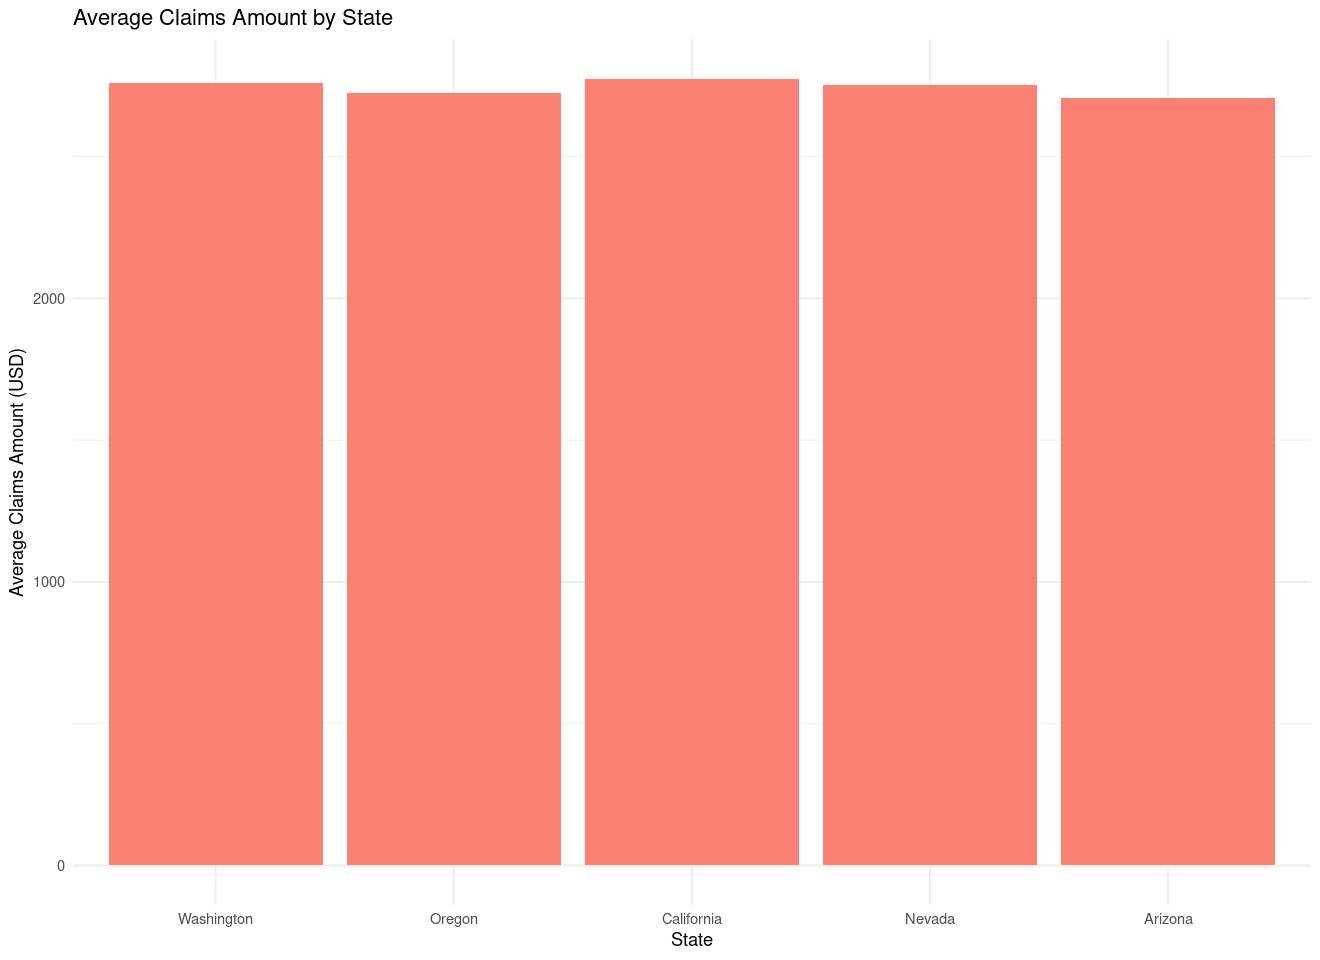

In [23]:
# Summary dataframe for average number and amount of claims by state
summary_q7 <- claims_df %>%
  group_by(customer_state) %>%
  summarise(avg_total_claims = mean(total_claims), avg_total_claims_amount = mean(total_claims_amount))

summary_q7

# Bar chart for average number of claims by state
ggplot(claims_df, aes(x = customer_state, y = total_claims)) +
  geom_bar(stat = "summary", fun = "mean", fill = "lightblue") +
  theme_minimal() +
  labs(title = "Average Number of Claims by State", x = "State", y = "Average Number of Claims")

# Bar chart for average claims amount by state
ggplot(claims_df, aes(x = customer_state, y = total_claims_amount)) +
  geom_bar(stat = "summary", fun = "mean", fill = "salmon") +
  theme_minimal() +
  labs(title = "Average Claims Amount by State", x = "State", y = "Average Claims Amount (USD)")






## Question 8


**Question**:
How do claim amounts and frequencies compare across different customer segments and policy types?


**Answer**:
No, there do not appear to be significant differences in the frequency of claims across different policy types, with the numbers being quite close: Corporate (2.39), Personal (2.389), and Special (2.43). However, when looking at the claim amounts:

The average claims amount is slightly higher for Special policy holders (2792.55) compared to Corporate (2747.89) and Personal (2741.30), indicating that while claim frequencies are similar, the costliness of claims can vary slightly by policy type, suggesting a modest impact on profitability.

## Supporting Analysis


policy,avg_total_claims,avg_total_claims_amount
<fct>,<dbl>,<dbl>
Personal,2.389652,2741.304
Corporate,2.390813,2747.892
Special,2.433460,2792.551


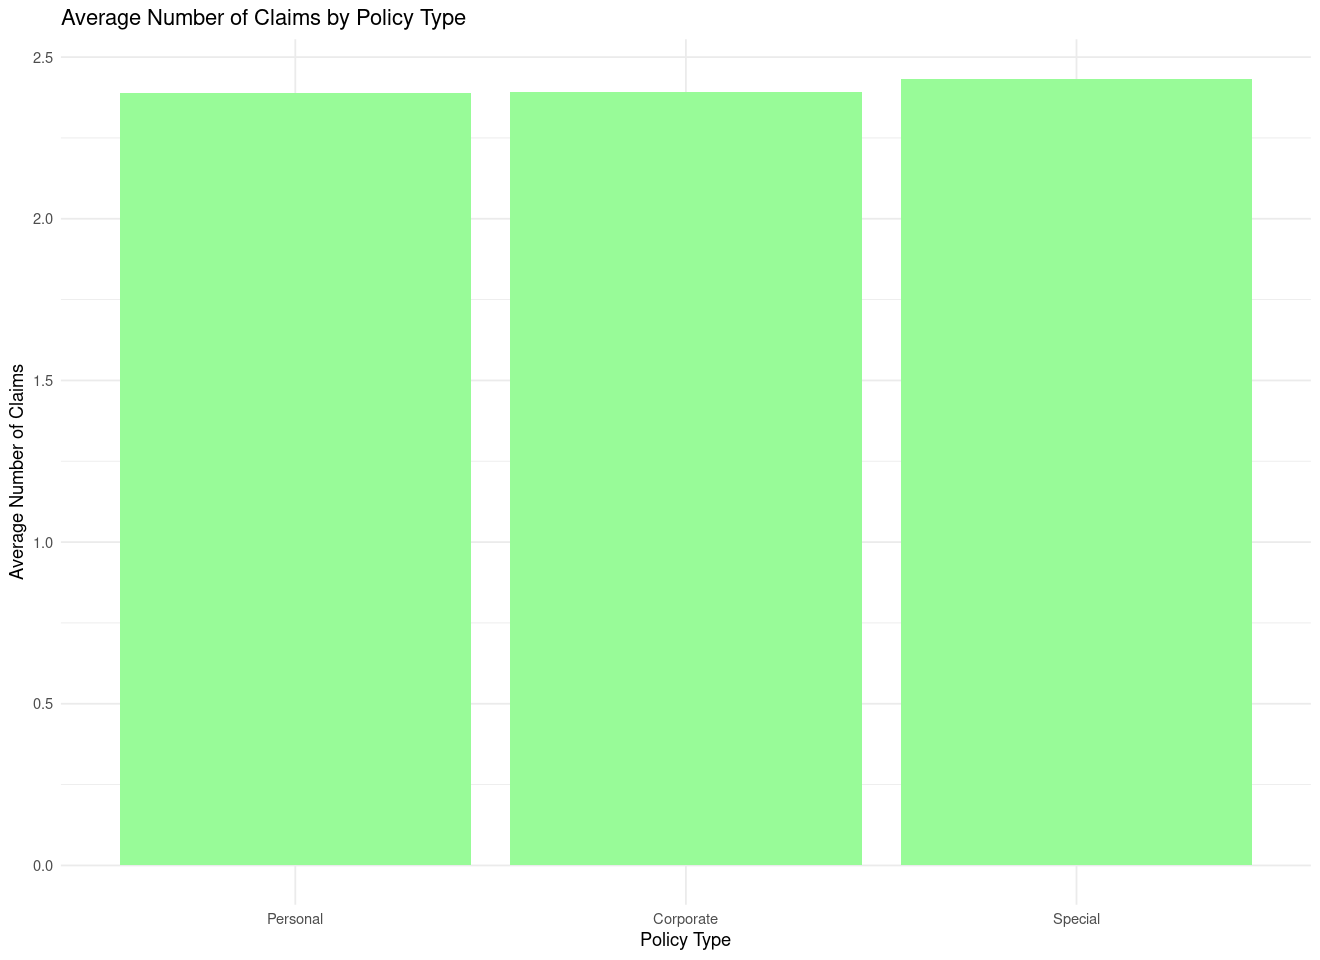

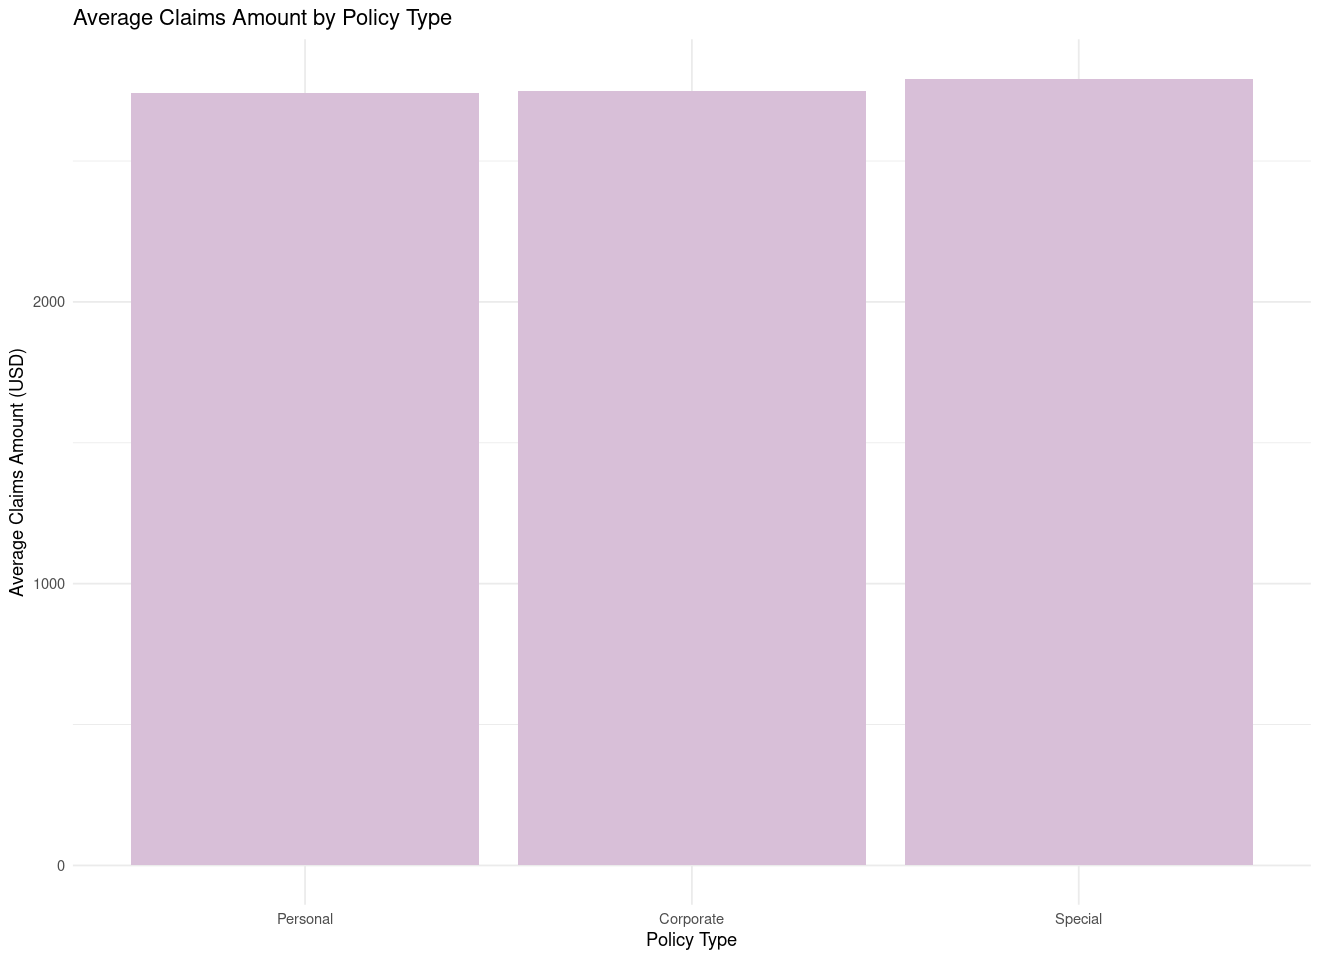

In [22]:
# Summary dataframe for average number and amount of claims by policy type
summary_q8 <- claims_df %>%
  group_by(policy) %>%
  summarise(avg_total_claims = mean(total_claims), avg_total_claims_amount = mean(total_claims_amount))

summary_q8

# Bar chart for average number of claims by policy type
ggplot(claims_df, aes(x = policy, y = total_claims)) +
  geom_bar(stat = "summary", fun = "mean", fill = "palegreen") +
  theme_minimal() +
  labs(title = "Average Number of Claims by Policy Type", x = "Policy Type", y = "Average Number of Claims")

# Bar chart for average claims amount by policy type
ggplot(claims_df, aes(x = policy, y = total_claims_amount)) +
  geom_bar(stat = "summary", fun = "mean", fill = "thistle") +
  theme_minimal() +
  labs(title = "Average Claims Amount by Policy Type", x = "Policy Type", y = "Average Claims Amount (USD)")





# Executive Summary (20 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

<br>

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

<br>

3.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add you executive summary in the text block below**.

## Introduction
...
In the dynamic arena of car insurance, companies are on a constant quest to refine their pricing mechanisms, boost operational efficiencies, and tailor their policy offerings to maximize profitability. The core business problem for this company involves pinpointing the determinants of customer lifetime value and integrating these insights with effective cost control measures. Achieving sustained success necessitates a deep dive into the relationship between customer demographics, policy specifics, and claims information to fine-tune pricing and policy frameworks. The goal of this analysis was to identify critical factors that distinguish the most valuable customers from those who are less financially beneficial to the company. Through a series of thoughtfully designed questions, our goal was to shed light on actionable insights that would facilitate informed strategic decisions.

## Key Findings
...
- Demographic Insights for Profitability: Our analysis indicated a predominant share of profitable customers are female and predominantly located in regions like California and Oregon. This insight is pivotal for crafting targeted marketing initiatives and adapting regional pricing strategies to attract and retain these high-value segments.

- Claims Analysis and Customer Value: We observed a notable negative correlation between the frequency and aggregate amount of claims and customer lifetime value. This underscores the importance of sophisticated risk management and claims handling to mitigate potential erosion of value.

- Analysis of Policy Types: Our findings revealed noticeable disparities in lifetime values among different policy categories, with 'Special' policies not performing as well as 'Corporate' and 'Personal' policies. This signals a clear opportunity for policy review and adjustment to improve profitability.

- The Link Between Premiums and Value: A significant positive correlation was found between monthly premium amounts and customer lifetime value, suggesting that customers paying higher premiums tend to be more lucrative over time.

These insights are crucial for identifying strategic leverage points where targeted adjustments could significantly boost profitability and enhance customer satisfaction.

## Recommendations
...
Based on our analysis, the following recommendations are proposed:

- Focused Customer Acquisition: Intensify marketing campaigns towards demographics proven to be highly profitable, especially targeting females and customers in high-value regions like California and Oregon. This strategy aims to enrich the customer base with individuals of higher lifetime value.

- Advanced Claims Management: Deploy sophisticated analytics to forecast claim frequencies and severities accurately. Proactive risk management, coupled with encouraging preventive behaviors among customers, can substantially reduce claim expenditures and preserve customer value.

- Policy Optimization: Conduct a thorough review of 'Special' policy offerings with an eye towards restructuring or adjusting pricing to boost their profitability. Modifications could include altering coverage parameters or offering incentives to customers with low claim histories.

- Refined Premium Pricing Strategy: Craft a dynamic pricing model that reflects the strong association between premium levels and customer lifetime value. This model should factor in diverse risk elements and customer behaviors to achieve more precise and profitable premium settings.

Implementing these recommendations is expected to fortify the company’s financial performance and secure a competitive advantage in the market.